In [2]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import datetime as dt

In [122]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
df=pd.read_excel(r"C:\Users\Shaygan\Desktop\4G-dbscan\4G-TEHRAN.xlsx")
df['dayofweek'] = df['Date'].dt.weekday
dft=df[['4G','dayofweek','Date']]
df['dayofweek'] = df['Date'].dt.weekday
dft=df[['4G','dayofweek','Date']]
dft['Date'] = pd.to_datetime(dft['Date'])    
dft['date_delta'] = (dft['Date'] - dft['Date'].min())  / np.timedelta64(1,'D')

sat=dft[dft['dayofweek']==0][['date_delta','4G','Date']].reset_index(drop=True)
sun=dft[dft['dayofweek']==1][['date_delta','4G','Date']].reset_index(drop=True)
mon=dft[dft['dayofweek']==2][['date_delta','4G','Date']].reset_index(drop=True)
tus=dft[dft['dayofweek']==3][['Date','4G']].reset_index(drop=True)
wen=dft[dft['dayofweek']==4][['Date','4G']].reset_index(drop=True)
ths=dft[dft['dayofweek']==5][['Date','4G']].reset_index(drop=True)
fri=dft[dft['dayofweek']==6][['Date','4G']].reset_index(drop=True)
#sat = StandardScaler().fit_transform(sat)

Clus_dataSet = sat[['4G','date_delta']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = np.array(Clus_dataSet, dtype=np.float64)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.1, min_samples=4).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
sat['Clus_Db']=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 

# A sample of clusters
print(sat[['4G','date_delta','Clus_Db']].head())

# number of labels
print("number of labels: ", set(labels))

Clusterlabels=sat[['4G','date_delta','Date','Clus_Db']]
#Dashboard.to_excel('Dashboard.xlsx',sheet_name='Sheet1')
Clusterlabels.to_excel('Clusterlabels.xlsx',sheet_name='Sheet1')
#in this file Clus_Db= -1 are noise data

           4G  date_delta  Clus_Db
0   92589.554         0.0        0
1   99689.454         7.0        0
2  106250.233        14.0        0
3  108793.570        21.0        0
4   48182.547        28.0       -1
number of labels:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, -1}


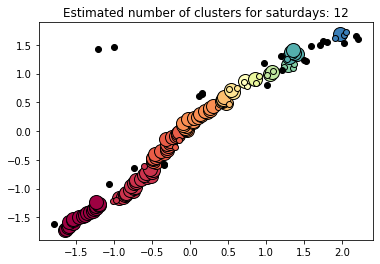

number of noise(s):  23


In [124]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = Clus_dataSet[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = Clus_dataSet[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters for saturdays: %d' % realClusterNum)
plt.show()

n_noise_ = list(labels).count(-1)
print('number of noise(s): ', n_noise_)

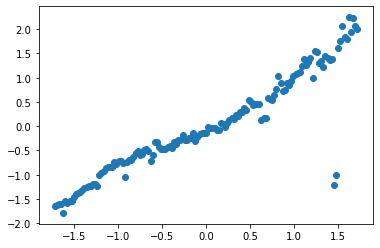

Estimated number of clusters: 11


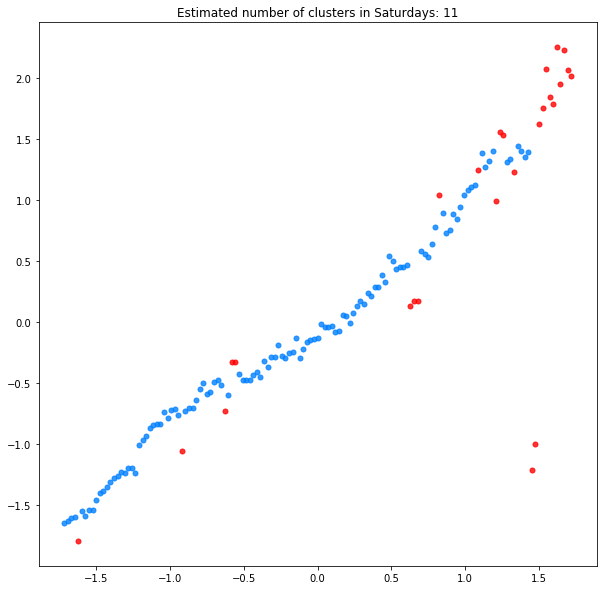

In [29]:
#this is a different method
a = []
x = []
y=[]
for i in range(0, len(sat)-1):
    a.append([i,sat["4G"][i]])    

X = a

X = StandardScaler().fit_transform(X)
for i in range(0,len(X)):
    x.append(X[i][0])
    y.append(X[i][1])

plt.scatter(x,y)
plt.show()
db = DBSCAN(eps=0.1, min_samples=4).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)

unique_labels = set(labels)
plt.figure(num=None, figsize=(10, 10), facecolor='w', edgecolor='k')
for k in unique_labels:
    col=[0,0.5,1,1]
    if k == -1:
        col = [1, 0, 0, 1]
    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', color=tuple(col),markersize=5, alpha=0.8)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', color=tuple(col), markersize=5, alpha=0.8)

plt.title('Estimated number of clusters in Saturdays: %d' % n_clusters_)
plt.show()